### Getting started

In [55]:
# Importing the required packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Understanding the data

In [56]:
# Reading the data
traindf=pd.read_csv(r"C:\Users\hp\Downloads\House_Rent_Train.csv")

In [57]:
# Shape of the dataframe
traindf.shape

(20555, 25)

In [58]:
# Displaying the data
traindf.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,BHK2,NaN,21-04-2018 14:44,12.934471,77.634471,FAMILY,1,1,1,...,2.0,E,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",CORP_BORE,AP,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,BHK2,Bellandur,9/10/2017 12:48,12.929557,77.672280,ANYONE,0,1,0,...,2.0,NE,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORPORATION,AP,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,BHK3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,FAMILY,0,1,0,...,3.0,E,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,BHK1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,FAMILY,0,0,0,...,1.0,E,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,BHK3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,FAMILY,0,0,0,...,3.0,E,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",CORPORATION,IH,1.0,45000.0


In [59]:
# Columns of the dataframe
traindf.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies', 'rent'],
      dtype='object')

In [60]:
# Datatypes of the column
traindf.dtypes

id                  object
type                object
locality            object
activation_date     object
latitude           float64
longitude          float64
lease_type          object
gym                  int64
lift                 int64
swimming_pool        int64
negotiable           int64
furnishing          object
parking             object
property_size        int64
property_age       float64
bathroom           float64
facing              object
cup_board          float64
floor              float64
total_floor        float64
amenities           object
water_supply        object
building_type       object
balconies          float64
rent               float64
dtype: object

Datatypes of the columns looks completely fine.

In [61]:
# Number of unique values in the each column
traindf.nunique()

id                 20523
type                   9
locality            1917
activation_date    19566
latitude           17733
longitude          17726
lease_type             4
gym                    2
lift                   2
swimming_pool          2
negotiable             2
furnishing             3
parking                4
property_size       1141
property_age          44
bathroom               8
facing                 8
cup_board             19
floor                 23
total_floor           27
amenities           4994
water_supply           3
building_type          4
balconies              9
rent                 206
dtype: int64

#### Dealing with null values

In [62]:
# Null values
traindf.isna().sum()

id                   0
type                27
locality           160
activation_date     23
latitude            23
longitude           23
lease_type          23
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age        23
bathroom            23
facing              23
cup_board           23
floor               23
total_floor         23
amenities           23
water_supply        23
building_type       23
balconies           23
rent                23
dtype: int64

We can clearly see that 23 rows are missing the majority of the values (15/25), which makes the records invalid and leaves us with little option to fill in the values. So, I dropped those 23 records and the null records in the type column, as it is very low and filling it may reduce the accuracy of the model.

In [63]:
# Droping the null records in rent and type column
traindf.dropna(subset=['rent','type'],inplace=True)

<Axes: >

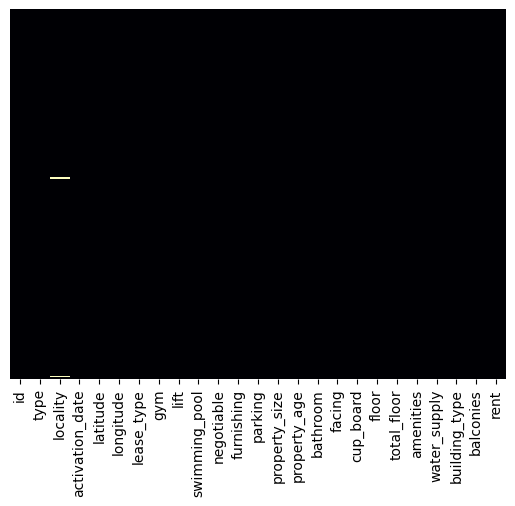

In [64]:
# Visualizing the null values in the dataset after droping the null record
sns.heatmap(traindf.isnull(),yticklabels=False,cbar=False,cmap='magma')

In [65]:
# Null records
traindf.isna().sum()

id                   0
type                 0
locality           137
activation_date      0
latitude             0
longitude            0
lease_type           0
gym                  0
lift                 0
swimming_pool        0
negotiable           0
furnishing           0
parking              0
property_size        0
property_age         0
bathroom             0
facing               0
cup_board            0
floor                0
total_floor          0
amenities            0
water_supply         0
building_type        0
balconies            0
rent                 0
dtype: int64

In [66]:
# Shape of the data after dealing with null values
traindf.shape

(20514, 25)

From the shape we can see that 41 rows were dropped in order to deal with null values.

In [67]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20514 entries, 0 to 20531
Data columns (total 25 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               20514 non-null  object 
 1   type             20514 non-null  object 
 2   locality         20377 non-null  object 
 3   activation_date  20514 non-null  object 
 4   latitude         20514 non-null  float64
 5   longitude        20514 non-null  float64
 6   lease_type       20514 non-null  object 
 7   gym              20514 non-null  int64  
 8   lift             20514 non-null  int64  
 9   swimming_pool    20514 non-null  int64  
 10  negotiable       20514 non-null  int64  
 11  furnishing       20514 non-null  object 
 12  parking          20514 non-null  object 
 13  property_size    20514 non-null  int64  
 14  property_age     20514 non-null  float64
 15  bathroom         20514 non-null  float64
 16  facing           20514 non-null  object 
 17  cup_board        

In [68]:
traindf.describe()

,latitude,longitude,gym,lift,swimming_pool,negotiable,property_size,property_age,bathroom,cup_board,floor,total_floor,balconies,rent
count,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000,20514.000000
mean,12.945753,77.637274,0.226479,0.361509,0.174710,0.711612,1061.574973,5.772204,1.857756,4.551282,1.873501,3.801014,1.149069,19050.640782
std,0.029598,0.110547,0.418563,0.480449,0.379728,0.453024,591.446387,6.353159,0.710698,335.301799,2.184744,3.185010,0.993621,8433.728066
min,12.900004,77.500072,0.000000,0.000000,0.000000,0.000000,1.000000,-1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,8000.000000
25%,12.918185,77.572032,0.000000,0.000000,0.000000,0.000000,700.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,12500.000000
50%,12.943807,77.633484,0.000000,0.000000,0.000000,1.000000,1045.500000,5.000000,2.000000,2.000000,1.000000,3.000000,1.000000,17500.000000
75%,12.970956,77.695702,0.000000,1.000000,0.000000,1.000000,1280.000000,10.000000,2.000000,3.000000,2.000000,4.000000,2.000000,24000.000000
max,12.999999,80.266346,1.000000,1.000000,1.000000,1.000000,50000.000000,400.000000,21.000000,48026.000000,25.000000,26.000000,13.000000,50000.000000


In [69]:
traindf['type'].value_counts()

type
BHK2        11671
BHK3         4387
BHK1         3607
RK1           553
BHK4          233
BHK4PLUS       31
bhk2           16
bhk3           12
1BHK1           4
Name: count, dtype: int64

In [70]:
# Dealing with collapsed type column value
# Capitalized values dealing
traindf['type']=traindf['type'].str.upper()

In [71]:
# Stripping the invalid character from the value
traindf['type']=traindf['type'].str.lstrip('1')

C:\Program Files\KMSpico\temp\ipykernel_42608\3112172994.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x=traindf['rent'])


<Axes: ylabel='Density'>

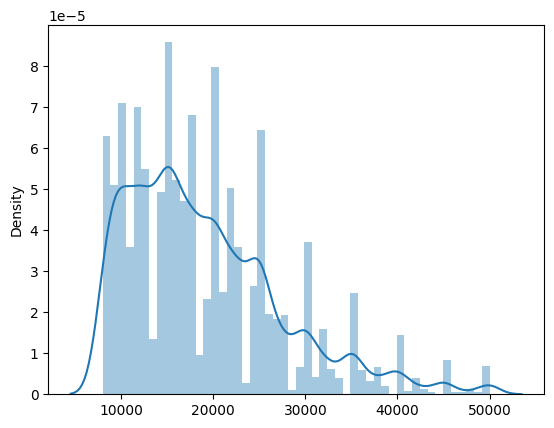

In [72]:
sns.distplot(x=traindf['rent'])

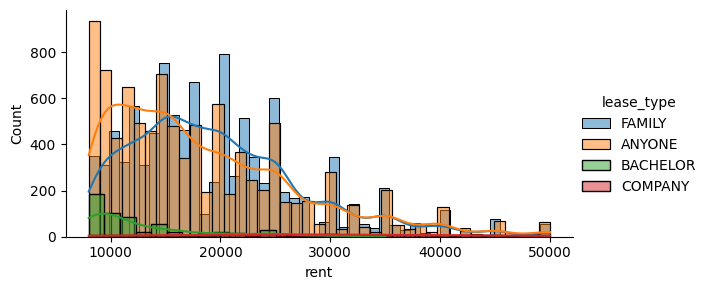

In [73]:
sns.FacetGrid(traindf,hue='lease_type',aspect=2)\
            .map(sns.histplot,'rent',kde=True)\
            .add_legend()
plt.show()

<Axes: xlabel='rent', ylabel='type'>

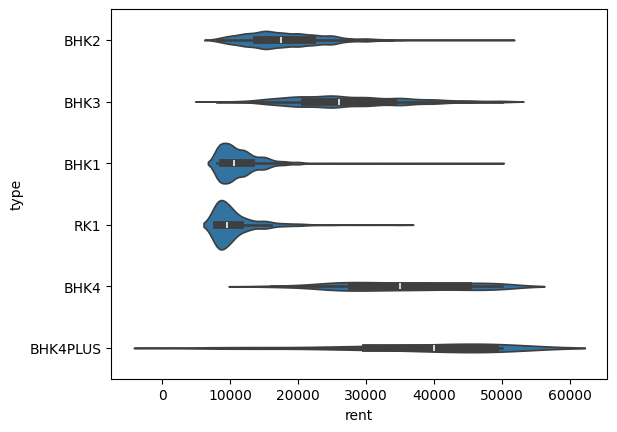

In [74]:
sns.violinplot(x=traindf['rent'],y=traindf['type'])

<Axes: xlabel='rent', ylabel='furnishing'>

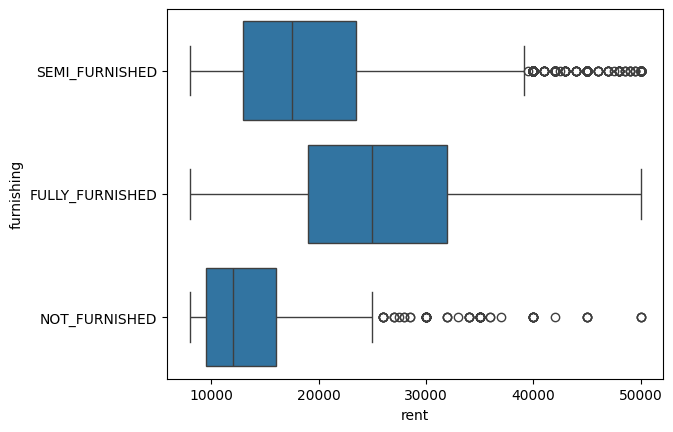

In [75]:
sns.boxplot(x='rent',y='furnishing',data=traindf)

#### Categorical values

In [97]:
# Displaying the value counts in column
# Listing the column names
list=['type','lease_type','furnishing','parking','bathroom','facing','cup_board','floor','total_floor','water_supply','building_type','balconies']
for i in list:
    print(traindf[i].value_counts())

type
BHK2        11687
BHK3         4399
BHK1         3611
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64
lease_type
FAMILY      10184
ANYONE       9685
BACHELOR      587
COMPANY        58
Name: count, dtype: int64
furnishing
SEMI_FURNISHED     17909
NOT_FURNISHED       1429
FULLY_FURNISHED     1176
Name: count, dtype: int64
parking
BOTH            10805
TWO_WHEELER      7219
FOUR_WHEELER     1448
NONE             1042
Name: count, dtype: int64
bathroom
2.0     11292
1.0      6262
3.0      2635
4.0       287
5.0        33
6.0         3
21.0        1
7.0         1
Name: count, dtype: int64
facing
E     9522
N     5922
W     2629
S     1219
NE     817
SE     197
NW     149
SW      59
Name: count, dtype: int64
cup_board
2.0        8590
3.0        3775
1.0        3748
0.0        1875
4.0        1314
5.0         447
6.0         426
8.0         114
7.0          77
10.0         75
9.0          36
12.0         17
15.0          6
11.0          5
20.0          4


In [98]:
traindf['type'].value_counts()

type
BHK2        11687
BHK3         4399
BHK1         3611
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

In [99]:
traindf['type'].value_counts()

type
BHK2        11687
BHK3         4399
BHK1         3611
RK1           553
BHK4          233
BHK4PLUS       31
Name: count, dtype: int64

In [100]:
# Assigning the labels manually by value pairs
type_value={'BHK1':1,'BHK2':2,'BHK3':3,'BHK4':4,'BHK4PLUS':5,'RK1':6}
leasetype_value={'FAMILY':1,'ANYONE':2,'BACHELOR':3,'COMPANY':4}
furnishing_value={'SEMI_FURNISHED':1,'NOT_FURNISHED':2,'FULLY_FURNISHED':3}
parking_value={'BOTH':1,'TWO_WHEELER':2,'FOUR_WHEELER':3,'NONE':0}
facing_value={'E':1,'N':2,'W':3,'S':4,'NE':5,'SE':6,'NW':7,'SW':8}
water_supply={'CORP_BORE':1,'CORPORATION':2,'BOREWELL':3}
buildtype_value={'IF':1,'AP':2,'IH':3,'GC':4}

In [101]:
# Encoding by replace
traindf['type']=traindf['type'].replace(type_value)
traindf['lease_type']=traindf['lease_type'].replace(leasetype_value)
traindf['furnishing']=traindf['furnishing'].replace(furnishing_value)
traindf['parking']=traindf['parking'].replace(parking_value)
traindf['facing']=traindf['facing'].replace(facing_value)
traindf['water_supply']=traindf['water_supply'].replace(water_supply)
traindf['building_type']=traindf['building_type'].replace(buildtype_value)

In [102]:
# Dataframe after encoding
traindf.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies,rent
0,ff8081815733a243015733b2876600a6,2,NaN,21-04-2018 14:44,12.934471,77.634471,1,1,1,1,...,2.0,1,2.0,6.0,12.0,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",1,2,2.0,40000.0
1,ff8081815ee25e15015ee50004da2acd,2,Bellandur,9/10/2017 12:48,12.929557,77.672280,2,0,1,0,...,2.0,5,2.0,3.0,4.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",2,2,2.0,22000.0
2,ff80818163f29c9e0163f46770b873e7,3,Thiruvanmiyur,12/6/2018 22:02,12.982870,80.262012,1,0,1,0,...,3.0,1,3.0,1.0,5.0,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",1,2,3.0,28000.0
3,ff80818164b68a700164b74b1b247a1d,1,Attiguppe,20-07-2018 16:22,12.955991,77.531634,1,0,0,0,...,1.0,1,1.0,1.0,2.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",2,3,0.0,8000.0
4,ff80818163b1faf00163b4b9b8a163b1,3,Kodihalli,31-05-2018 17:41,12.963903,77.649446,1,0,0,0,...,3.0,1,4.0,0.0,0.0,"{""LIFT"":false,""GYM"":false,""INTERNET"":false,""AC...",2,3,1.0,45000.0


In [103]:
# Getting know about amenities column
amenities=traindf['amenities'].to_list()
amenities[0]

'{"LIFT":true,"GYM":true,"INTERNET":true,"AC":false,"CLUB":true,"INTERCOM":true,"POOL":true,"CPA":true,"FS":true,"SERVANT":false,"SECURITY":true,"SC":true,"GP":true,"PARK":false,"RWH":true,"STP":true,"HK":false,"PB":true,"VP":true}'

In [104]:
traindf.shape

(20514, 25)

<Axes: >

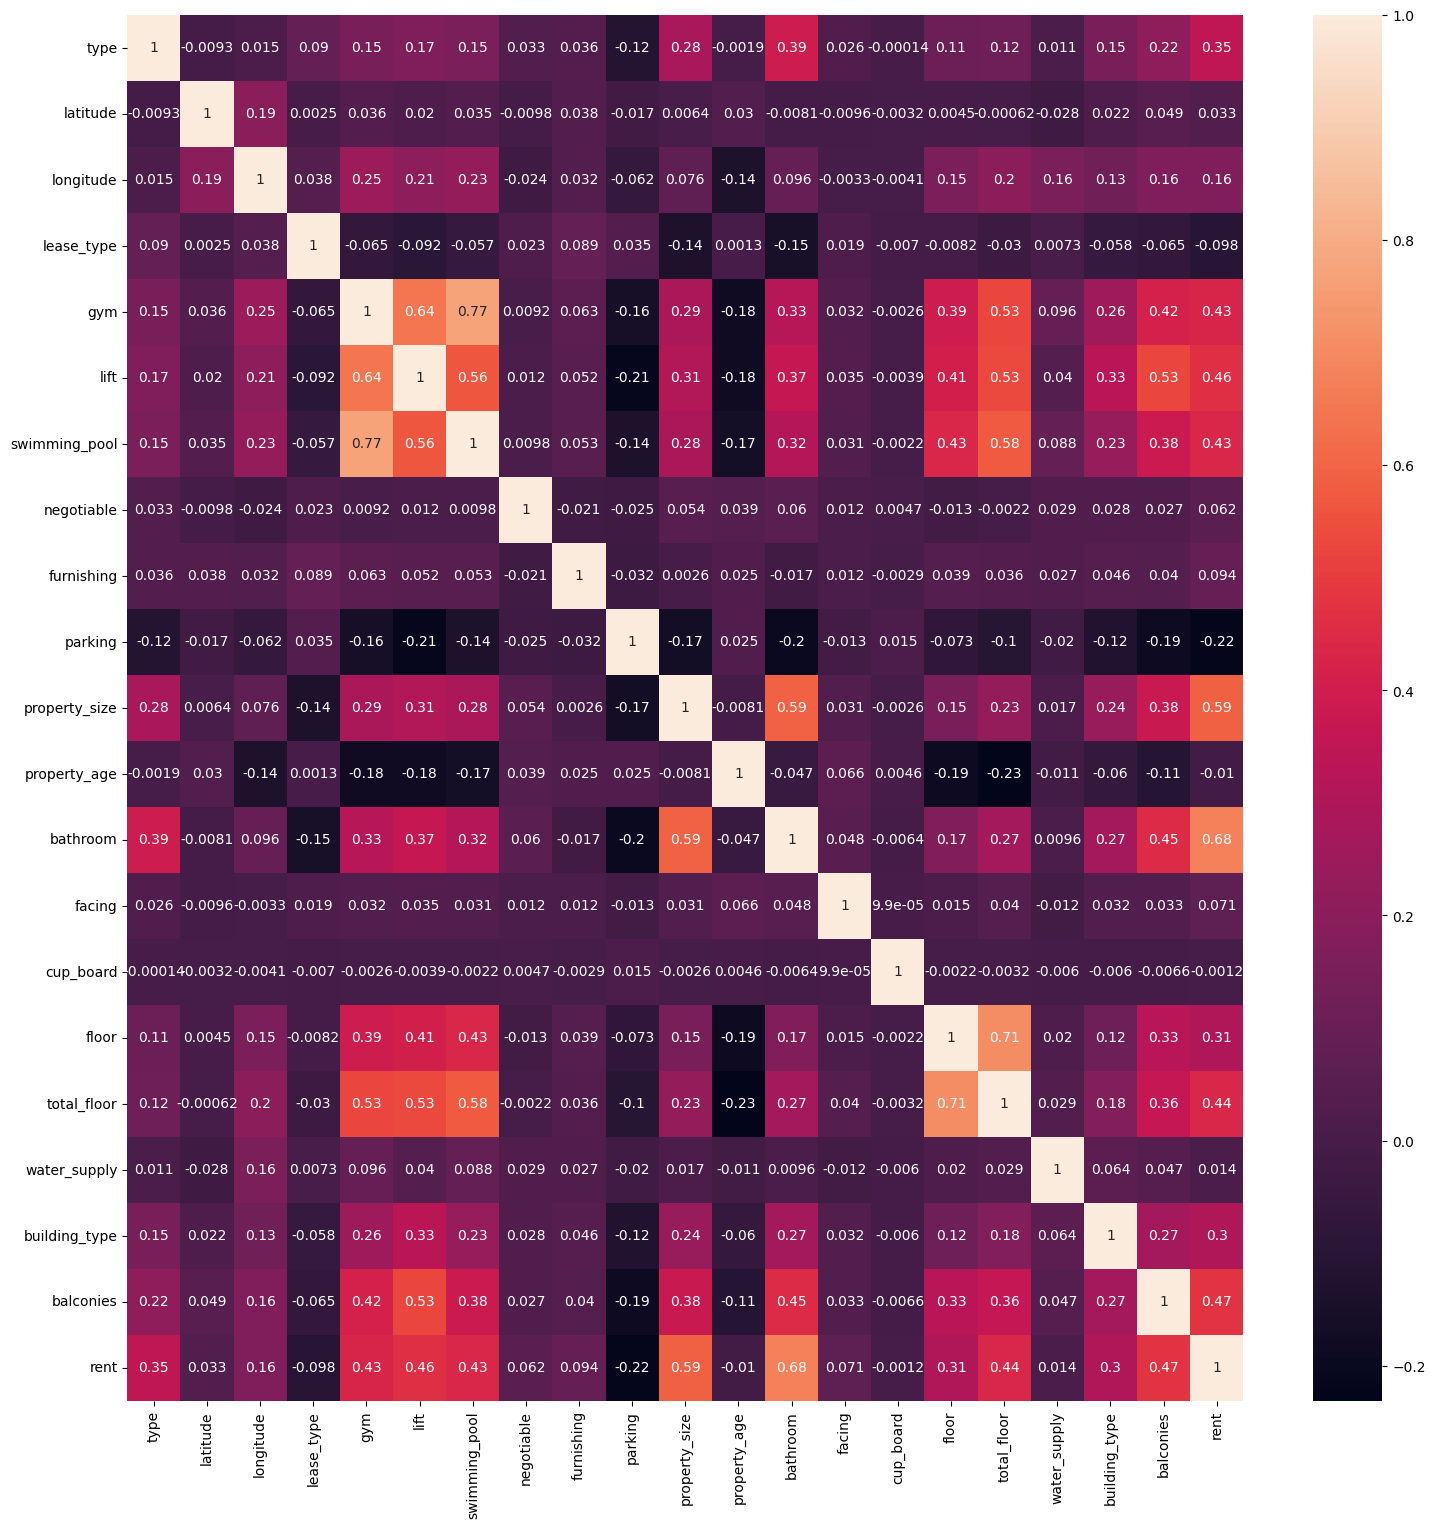

In [105]:
corr_df=traindf[['type','latitude','longitude','lease_type','gym','lift',
                 'swimming_pool','negotiable','furnishing','parking','property_size',
                 'property_age','bathroom','facing','cup_board','floor','total_floor',
                 'water_supply','building_type','balconies','rent']].dropna().corr()
plt.figure(figsize=(18, 18))
sns.heatmap(corr_df,annot=True)

In [110]:
X=traindf[['type','lease_type','gym','lift','swimming_pool','negotiable','furnishing','parking','property_size','property_age','bathroom','facing','cup_board','floor','total_floor','water_supply','building_type','balconies']]
y=traindf['rent']

In [111]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [112]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [113]:
score=lr.score(X_test,y_test)
print(score)

-1565.148443572273


In [114]:
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor(random_state=5)
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=5)

In [115]:
score=dt.score(X_test,y_test)
print(score)

0.37322403566561335


In [116]:
# Create a regressor
from sklearn.ensemble import RandomForestRegressor

# Create a regressor object
rf_reg = RandomForestRegressor(n_estimators=100, random_state=0)

# fit the model with X-train and y_train data
rf_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [117]:
score = rf_reg.score(X_test,y_test)
print(score * 100,"%")

68.60299047189804 %


In [134]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor(n_estimators = 100, learning_rate = 0.1555, random_state =42)
gbr.fit(X_train,y_train)

GradientBoostingRegressor(learning_rate=0.1555, random_state=42)

In [135]:
score = gbr.score(X_test,y_test)
print('Test score:',score*100,'%')

Test score: 69.81285106358067 %


#### Test data

In [136]:
# Reading the data
testdf=pd.read_csv(r"C:\Users\hp\Downloads\House_Rent_Test.csv")

In [137]:
# Shape of the data to be predict
testdf.shape

(4500, 24)

In [138]:
# Columns of the dataframe
testdf.columns

Index(['id', 'type', 'locality', 'activation_date', 'latitude', 'longitude',
       'lease_type', 'gym', 'lift', 'swimming_pool', 'negotiable',
       'furnishing', 'parking', 'property_size', 'property_age', 'bathroom',
       'facing', 'cup_board', 'floor', 'total_floor', 'amenities',
       'water_supply', 'building_type', 'balconies'],
      dtype='object')

In [139]:
# Number of null values
testdf.isna().sum()

id                 0
type               0
locality           0
activation_date    0
latitude           0
longitude          0
lease_type         0
gym                0
lift               0
swimming_pool      0
negotiable         0
furnishing         0
parking            0
property_size      0
property_age       0
bathroom           0
facing             0
cup_board          0
floor              0
total_floor        0
amenities          0
water_supply       0
building_type      0
balconies          0
dtype: int64

In [140]:
# Data
testdf.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,BHK2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,N,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",CORP_BORE,AP,1
1,ff80818157288e9301572c05651853a6,BHK2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,S,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
2,ff8081815f1afc58015f1b831fde166e,BHK1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,S,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORPORATION,IF,0
3,ff8081816035b31901603f7922c046e0,BHK1,Jayanagar 1st Block,11-12-2017 13:15,12.941533,77.592606,ANYONE,0,0,0,...,8,1,E,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",CORP_BORE,IF,0
4,ff8081815c3582f5015c38fc31aa73a4,BHK3,Whitefield Hope Farm Junction,11-07-2017 16:44,12.971083,77.751625,ANYONE,1,1,1,...,0,3,E,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",BOREWELL,AP,1


In [141]:
# Categories of type
testdf['type'].value_counts()

type
BHK2        2524
BHK3         990
BHK1         808
RK1          105
BHK4          66
BHK4PLUS       7
Name: count, dtype: int64

In [148]:
# Encoding by replace
testdf['type']=testdf['type'].replace(type_value)
testdf['lease_type']=testdf['lease_type'].replace(leasetype_value)
testdf['furnishing']=testdf['furnishing'].replace(furnishing_value)
testdf['parking']=testdf['parking'].replace(parking_value)
testdf['facing']=testdf['facing'].replace(facing_value)
testdf['water_supply']=testdf['water_supply'].replace(water_supply)
testdf['building_type']=testdf['building_type'].replace(buildtype_value)

In [143]:
testdf.head()

,id,type,locality,activation_date,latitude,longitude,lease_type,gym,lift,swimming_pool,...,property_age,bathroom,facing,cup_board,floor,total_floor,amenities,water_supply,building_type,balconies
0,ff8081815df539bc015df947ce976cca,2,Basavanagudi,22-08-2017 09:00,12.941603,77.568156,FAMILY,0,1,0,...,1,2,2,2,3,3,"{""LIFT"":true,""GYM"":false,""INTERNET"":false,""AC""...",1,2,1
1,ff80818157288e9301572c05651853a6,2,Rajaji Nagar,17-09-2017 16:33,12.998803,77.561887,ANYONE,0,0,0,...,7,1,4,2,0,3,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",2,1,0
2,ff8081815f1afc58015f1b831fde166e,1,Jeevan Bima Nagar,14-04-2018 17:27,12.966467,77.661063,ANYONE,0,0,0,...,10,1,4,1,0,1,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",2,1,0
3,ff8081816035b31901603f7922c046e0,1,Jayanagar 1st Block,11-12-2017 13:15,12.941533,77.592606,ANYONE,0,0,0,...,8,1,1,0,2,2,"{""LIFT"":false,""GYM"":false,""INTERNET"":true,""AC""...",1,1,0
4,ff8081815c3582f5015c38fc31aa73a4,3,Whitefield Hope Farm Junction,11-07-2017 16:44,12.971083,77.751625,ANYONE,1,1,1,...,0,3,1,3,3,4,"{""LIFT"":true,""GYM"":true,""INTERNET"":true,""AC"":f...",3,2,1


In [150]:
X_predict_test=testdf[['type','lease_type','gym','lift','swimming_pool','negotiable','furnishing','parking','property_size','property_age','bathroom','facing','cup_board','floor','total_floor','water_supply','building_type','balconies']]

In [153]:
arr = gbr.predict(X_predict_test)

In [154]:
df = pd.DataFrame(arr)

In [156]:
df.to_csv('predicted_value.csv')